Задача:
1. Проанализируйте тест между группами 0 и 3 по метрике линеаризованных лайков. Видно ли отличие? Стало ли 𝑝−𝑣𝑎𝑙𝑢𝑒 меньше по сравнению с обычным CTR?
2. Проанализируйте тест между группами 1 и 2 по метрике линеаризованных лайков. Видно ли отличие? Стало ли 𝑝−𝑣𝑎𝑙𝑢𝑒 меньше по сравнению с обычным CTR?
Данные берём в том же диапазоне, в котором проводился АБ-тест. Эксперимент проходил с 2023-07-30 по 2023-08-05 включительно

In [88]:
# загрузка библиотек
import pandahouse 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats

1. Проведем анализ 0 и 3 групп

In [89]:
# Загрузка датасета 
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20230820'
}

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-07-30' and '2023-08-05'
     and exp_group in (0,3)
GROUP BY exp_group, user_id
"""

df = pandahouse.read_clickhouse(q, connection=connection)
df.head()

,exp_group,user_id,likes,views,ctr
0,3,115383,12,44,0.272727
1,3,123580,2,11,0.181818
2,0,4944,8,41,0.195122
3,0,4504,5,15,0.333333
4,0,121508,6,25,0.240000


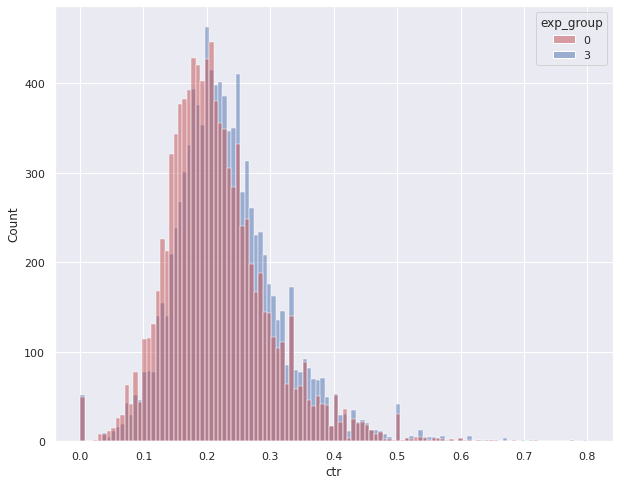

In [90]:
# Построим графики в seaborn для сравнения распределения ctr обеих групп
sns.set(rc={'figure.figsize':(10,8)})

groups = sns.histplot(data = df, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [91]:
# т-тест для метрики ctr
stats.ttest_ind(df[df.exp_group == 0].ctr,
                df[df.exp_group == 3].ctr,
                equal_var=False)

Ttest_indResult(statistic=-13.935320516755773, pvalue=6.216047483062228e-44)

In [92]:
# расчет контрольного ctr
ctr_control_1 = df[df.exp_group == 0].likes.sum() / df[df.exp_group == 0].views.sum()

In [93]:
# посмотрим что он из себя представляет
ctr_control_1 

0.20983799195924746

In [94]:
# расчет поюзерной метрики  𝑙𝑖𝑛𝑒𝑎𝑟𝑖𝑧𝑒𝑑_𝑙𝑖𝑘𝑒𝑠=𝑙𝑖𝑘𝑒𝑠−𝐶𝑇𝑅𝑐𝑜𝑛𝑡𝑟𝑜𝑙∗𝑣𝑖𝑒𝑤𝑠
df['lin_likes'] = df.likes - ctr_control_1 * df.views

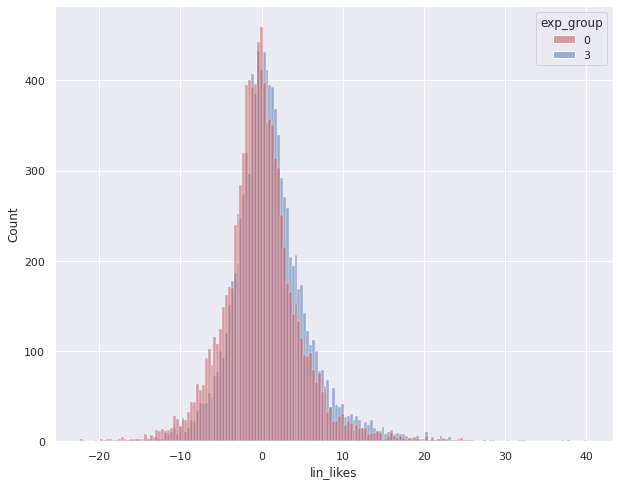

In [95]:
# Построим графики в seaborn для сравнения распределения 𝑙𝑖𝑛𝑒𝑎𝑟𝑖𝑧𝑒𝑑_𝑙𝑖𝑘𝑒𝑠 в обеих группах
sns.set(rc={'figure.figsize':(10,8)})

groups = sns.histplot(data = df, 
              x='lin_likes', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [96]:
# проведение т-теста для 𝑙𝑖𝑛𝑒𝑎𝑟𝑖𝑧𝑒𝑑_𝑙𝑖𝑘𝑒𝑠
stats.ttest_ind(df[df.exp_group == 0].lin_likes,
                df[df.exp_group == 3].lin_likes,
                equal_var=False)

Ttest_indResult(statistic=-16.186230032932844, pvalue=1.4918137745326139e-58)

Вывод:
Провела т-тест для метрик ctr и linearized_likes, округленный pvalue в первом случае 6.21e-44, во втором - 1.49e-58. Результаты обоих тестов говорят о том, что есть основание отклонить нулевую гипотезу о равенстве средних. Для метрики linearized_likes значение pvalue меньше, что говорит о том, что при использование данной метрики снижается ошибка первого рода (вероятность отклонить верную нулевую гипотезу).

2. Проведем аналих 1 и 2 групп

In [97]:
# Загрузка датасета 
connection = {
    'host': 'https://clickhouse.lab.karpov.courses',
    'password': 'dpo_python_2020',
    'user': 'student',
    'database': 'simulator_20230820'
}

q = """
SELECT exp_group, 
    user_id,
    sum(action = 'like') as likes,
    sum(action = 'view') as views,
    likes/views as ctr
FROM {db}.feed_actions 
WHERE toDate(time) between '2023-07-30' and '2023-08-05'
    and exp_group in (1,2)
GROUP BY exp_group, user_id
"""

df1 = pandahouse.read_clickhouse(q, connection=connection)
df1.head()

,exp_group,user_id,likes,views,ctr
0,1,109963,3,15,0.200000
1,1,26117,32,141,0.226950
2,1,138232,18,73,0.246575
3,1,18392,7,32,0.218750
4,1,26295,39,141,0.276596


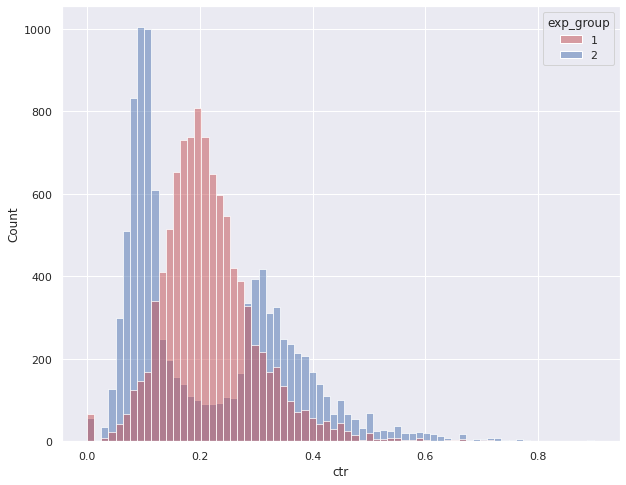

In [98]:
# Построим графики в seaborn для сравнения распределения ctr обеих групп 
sns.set(rc={'figure.figsize':(10,8)})

groups = sns.histplot(data = df1, 
              x='ctr', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [99]:
# т-тест для метрики ctr
stats.ttest_ind(df1[df1.exp_group == 1].ctr,
                df1[df1.exp_group == 2].ctr,
                equal_var=False)

Ttest_indResult(statistic=0.4051491913112757, pvalue=0.685373331140751)

In [100]:
# расчет контрольного ctr
ctr_control_2 = df1[df1.exp_group == 1].likes.sum() / df1[df1.exp_group == 2].views.sum()
ctr_control_2

0.21281090113942747

In [101]:
# расчет поюзерной метрики  𝑙𝑖𝑛𝑒𝑎𝑟𝑖𝑧𝑒𝑑_𝑙𝑖𝑘𝑒𝑠 = 𝑙𝑖𝑘𝑒𝑠 − 𝐶𝑇𝑅𝑐𝑜𝑛𝑡𝑟𝑜𝑙 ∗ 𝑣𝑖𝑒𝑤𝑠
df1['lin_likes'] = df1.likes - ctr_control_2 * df.views

In [103]:
 # смотрим что получилось
df1['lin_likes']

0        -6.363680
1        29.659080
2         9.274753
3         3.807836
4        33.679727
           ...    
19892    -4.469029
19893    -5.599250
19894    39.233458
19895     2.741670
19896    -1.640545
Name: lin_likes, Length: 19897, dtype: float64

In [ ]:
# Построим графики в seaborn для сравнения распределения 𝑙𝑖𝑛𝑒𝑎𝑟𝑖𝑧𝑒𝑑_𝑙𝑖𝑘𝑒𝑠 обеих групп
sns.set(rc={'figure.figsize':(10,8)})

groups = sns.histplot(data = df1, 
              x='lin_likes', 
              hue='exp_group', 
              palette = ['r', 'b'],
              alpha=0.5,
              kde=False)

In [ ]:
# т-тест
stats.ttest_ind(df1[df1.exp_group == 1].lin_likes,
                df1[df1.exp_group == 2].lin_likes,
                equal_var=False)

Вывод:
Во-первых хочется отметить характер распределения для метрик ctr и linearized_likes: если распределение ctr для 2 группы бимодально и отличается от нормального, то linearized_likes для этой же группы имеет нормальное распределение, таким образом, результат т-теста для метрики ctr не имеет статистической ценности, в то время как для метрики linearized_likes применение этого метода анализа обосновано.
Так как по условию задания необходимо сравнить значения pvalue, то так и сделаю:
для ctr это 0.6854, а для linearized_likes - 0.0008. Если делать выводы только по значению pvalue, не учитывая характер распределения метрик, то выводы будут диаметрально противоположными: по значению pvalue для ctr принимается нулевая гипотеза о равенстве средних, а для linearized_likes нулевая гипотеза отклоняется и принимается альтернативная: средние групп не равны.
Использование метрик-отношений, которой и является метрика linearized_likes, обосновано, если основная метрика имеет распределение, отличное от нормального.